# Baseball Case Study

# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors


Output: Number of predicted wins (W)

# Attribute Information

W -- WIN  (Target Variable)

R -- Runs

AB -- At Bats

H -- Hits

2B -- Doubles

3B -- Triples

HR -- Homeruns

BB -- Walks

SO -- Strikeouts

SB -- Stolen Bases

RA -- Runs Allowed

ER -- Earned Runs

ERA -- Earned Run Average

SHO -- Shutouts

SV -- Saves

E -- Errors


# Importing Requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the Dataset
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
## Checking the shape
df.shape

(30, 17)

1-our dataset have 30 rows and 17 attributes including target attribute W(Wins)

2-This Is regression Problem Statement because target is in numerical/integer format.

In [4]:
##Checking Datatype
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the attributes are 'Int64' data type except ERA which is of 'float64' data type.

In [5]:
## Getting Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


1- This show that all features have similar number of rows means no null values present.

2- Data Type of attributes are ok.

In [6]:
## Checcking Null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:title={'center':'NUll Values Heatmap'}>

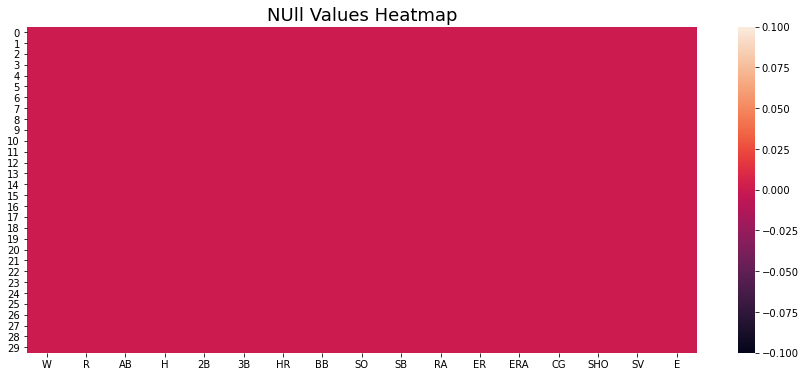

In [7]:
plt.figure(figsize=(15,6))
plt.title('NUll Values Heatmap',fontsize=18)
sns.heatmap(df.isnull())

No null values present in our dataset.

In [8]:
## Getting Statistical Summary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation:

1- We can observe from the above table that for most of attributes Mean and Median (50%) is approximatly same.

2- We can infer from this that Most of attributes data are normally distributed.

3-In some attributes such as 'H','HR', Mean value is greater than Median value which means data is right skewed in Nature.

4- It seems from above table that possiblity of outliers are very less in our dataset.

<AxesSubplot:title={'center':'Correlation Heat Map'}>

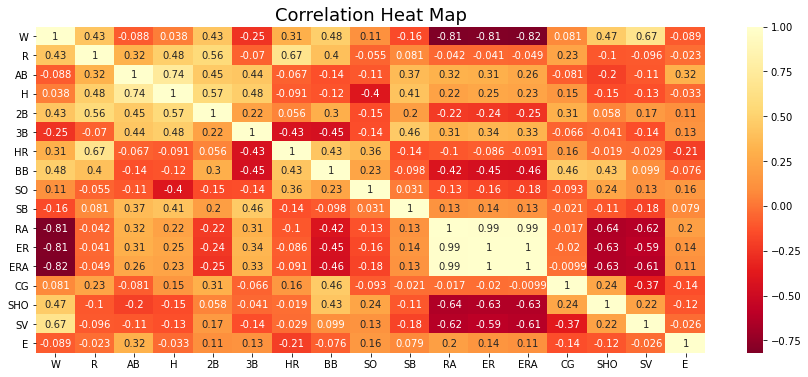

In [9]:
### Correlation Matrix
plt.figure(figsize=(15,6))
plt.title('Correlation Heat Map',fontsize=18)
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd_r')

Earned Runs and Earned Runes Average are highly correlated with each other. Ther are almost similar as they are showing 99% correlation on Correlation Plot.

<AxesSubplot:title={'center':'Correlation with Target'}>

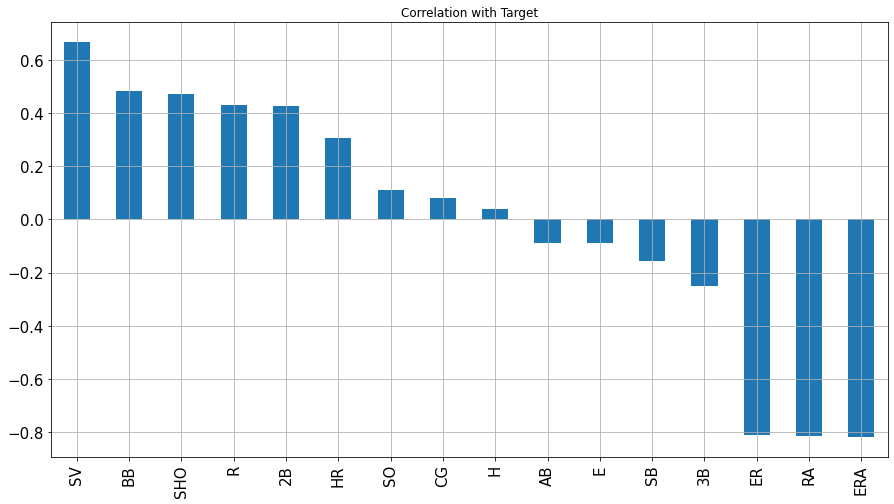

In [10]:
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot.bar(figsize=(15,8),grid=True,title='Correlation with Target',fontsize=15)

Observation:

1- SV (Saves),BB (Walks),SHO (Shutouts) these are important features which are positivly correlated to our Target Attribute Wins.

2- ERA(Earned Run Average),RA(Runs Allowed),ER these are the features which are highly negatively correlated to our target attribute.

3- Feature like H(Hits),AB(at bats) has correlation value near to zero which means almost no significance for target attribute prediction.

# Data Visualization

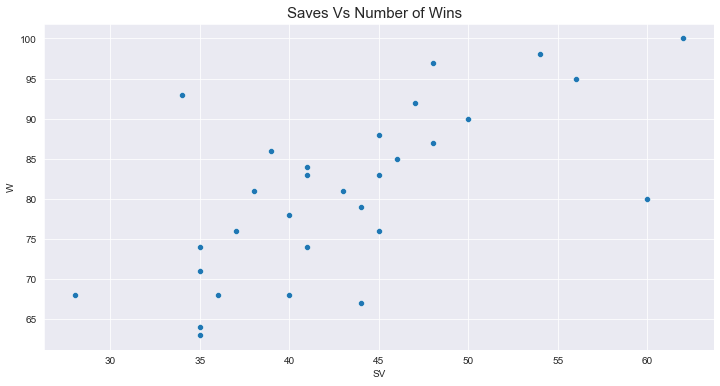

In [11]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Saves Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['SV'],df['W'],data=df)
plt.show()

observation:

1- We have very less data points.

2- from above scater plot it shows as Number of saves increase the Game winning Chances(numbers) also get increase.

3- Moderate linear relation we get here.

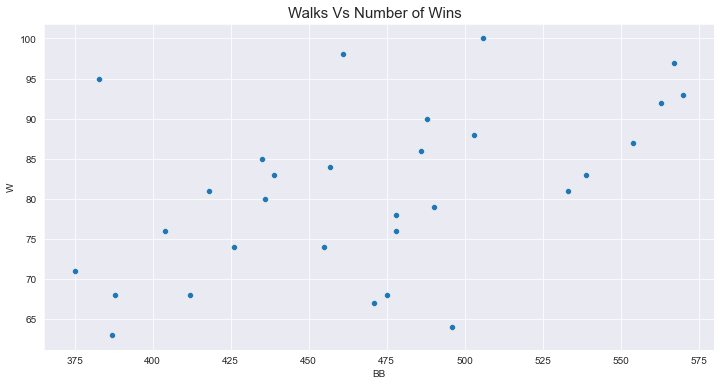

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Walks Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['BB'],df['W'],data=df,y_jitter=True)
plt.show()

Observation:
    
1- A mix kind of response we are getting.

2-In most general way we can observe that as number of walks increases the Number of winnings also get increases.

3- There are some points where we can see higher winning number despite lower walks we may consider that as annomly in data and we will correct it.

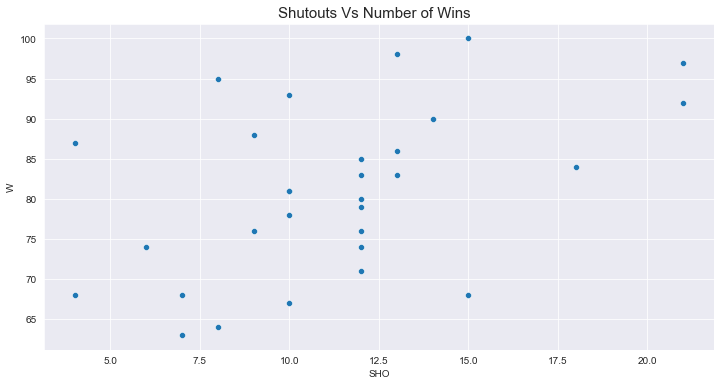

In [13]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Shutouts Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['SHO'],df['W'],data=df,y_jitter=True)
plt.show()

Here we get a mix trend of our data points. In some points where shutouts are same are getting different winnings numbers.

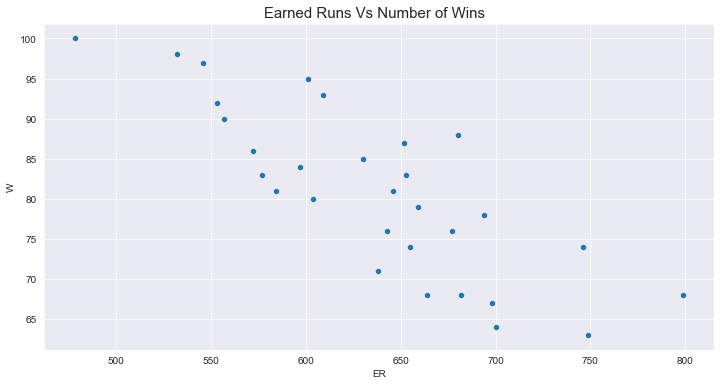

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Earned Runs Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['ER'],df['W'],data=df,y_jitter=True)
plt.show()

Observation:
    
1- We get a trend of datapoints which shows a negative slope.

2- A Earned Runes increases the number of winnings games decreases.

3- Inverse relationship between ER and Winning Numbers.

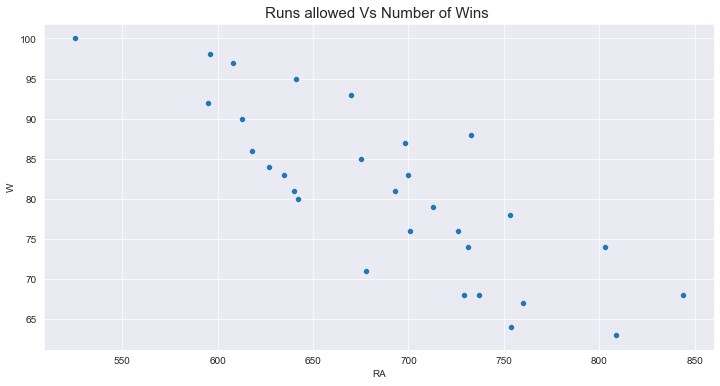

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Runs allowed Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['RA'],df['W'],data=df,y_jitter=True)
plt.show()

1- Negative slope we are getting. 

2- As Runs allowed increases we can see that the number of wininigs are getting less.

3- A complete inverse proportation we get from this plot.

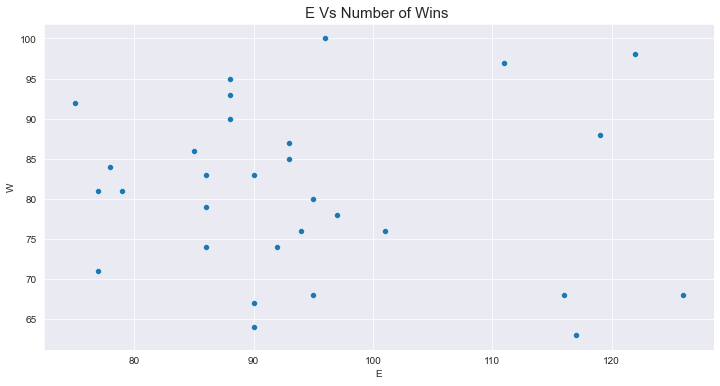

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' E Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['E'],df['W'],data=df,y_jitter=True)
plt.show()

We can't get very useful insight from this data points. A complete moderate datapoints we are getting on scatter plot.

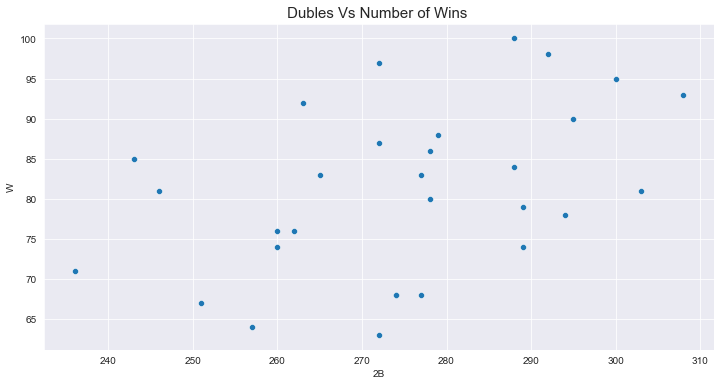

In [17]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Dubles Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['2B'],df['W'],data=df,y_jitter=True)
plt.show()

There is some positive linear relation we can see here in this plot.

if any team take more double in the match/Tournament , the number of winning games inreases.

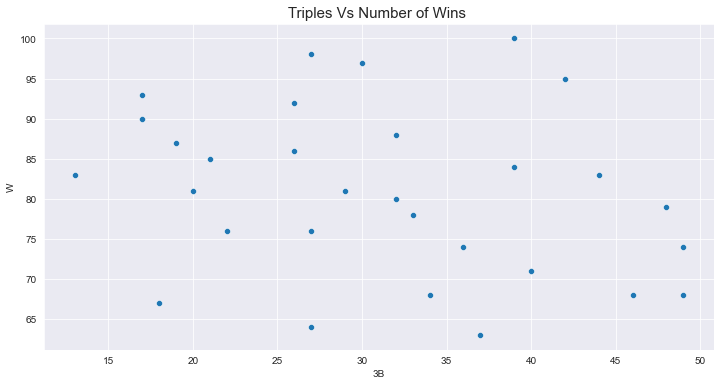

In [18]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Triples Vs Number of Wins  ',fontsize=15)
sns.scatterplot(df['3B'],df['W'],data=df,y_jitter=True)
plt.show()

There is no such a relation with number of wins and Triples.

data points are scatter all across the x & Y irrespective of X and Y values.

No trend/conclusion  we can get .

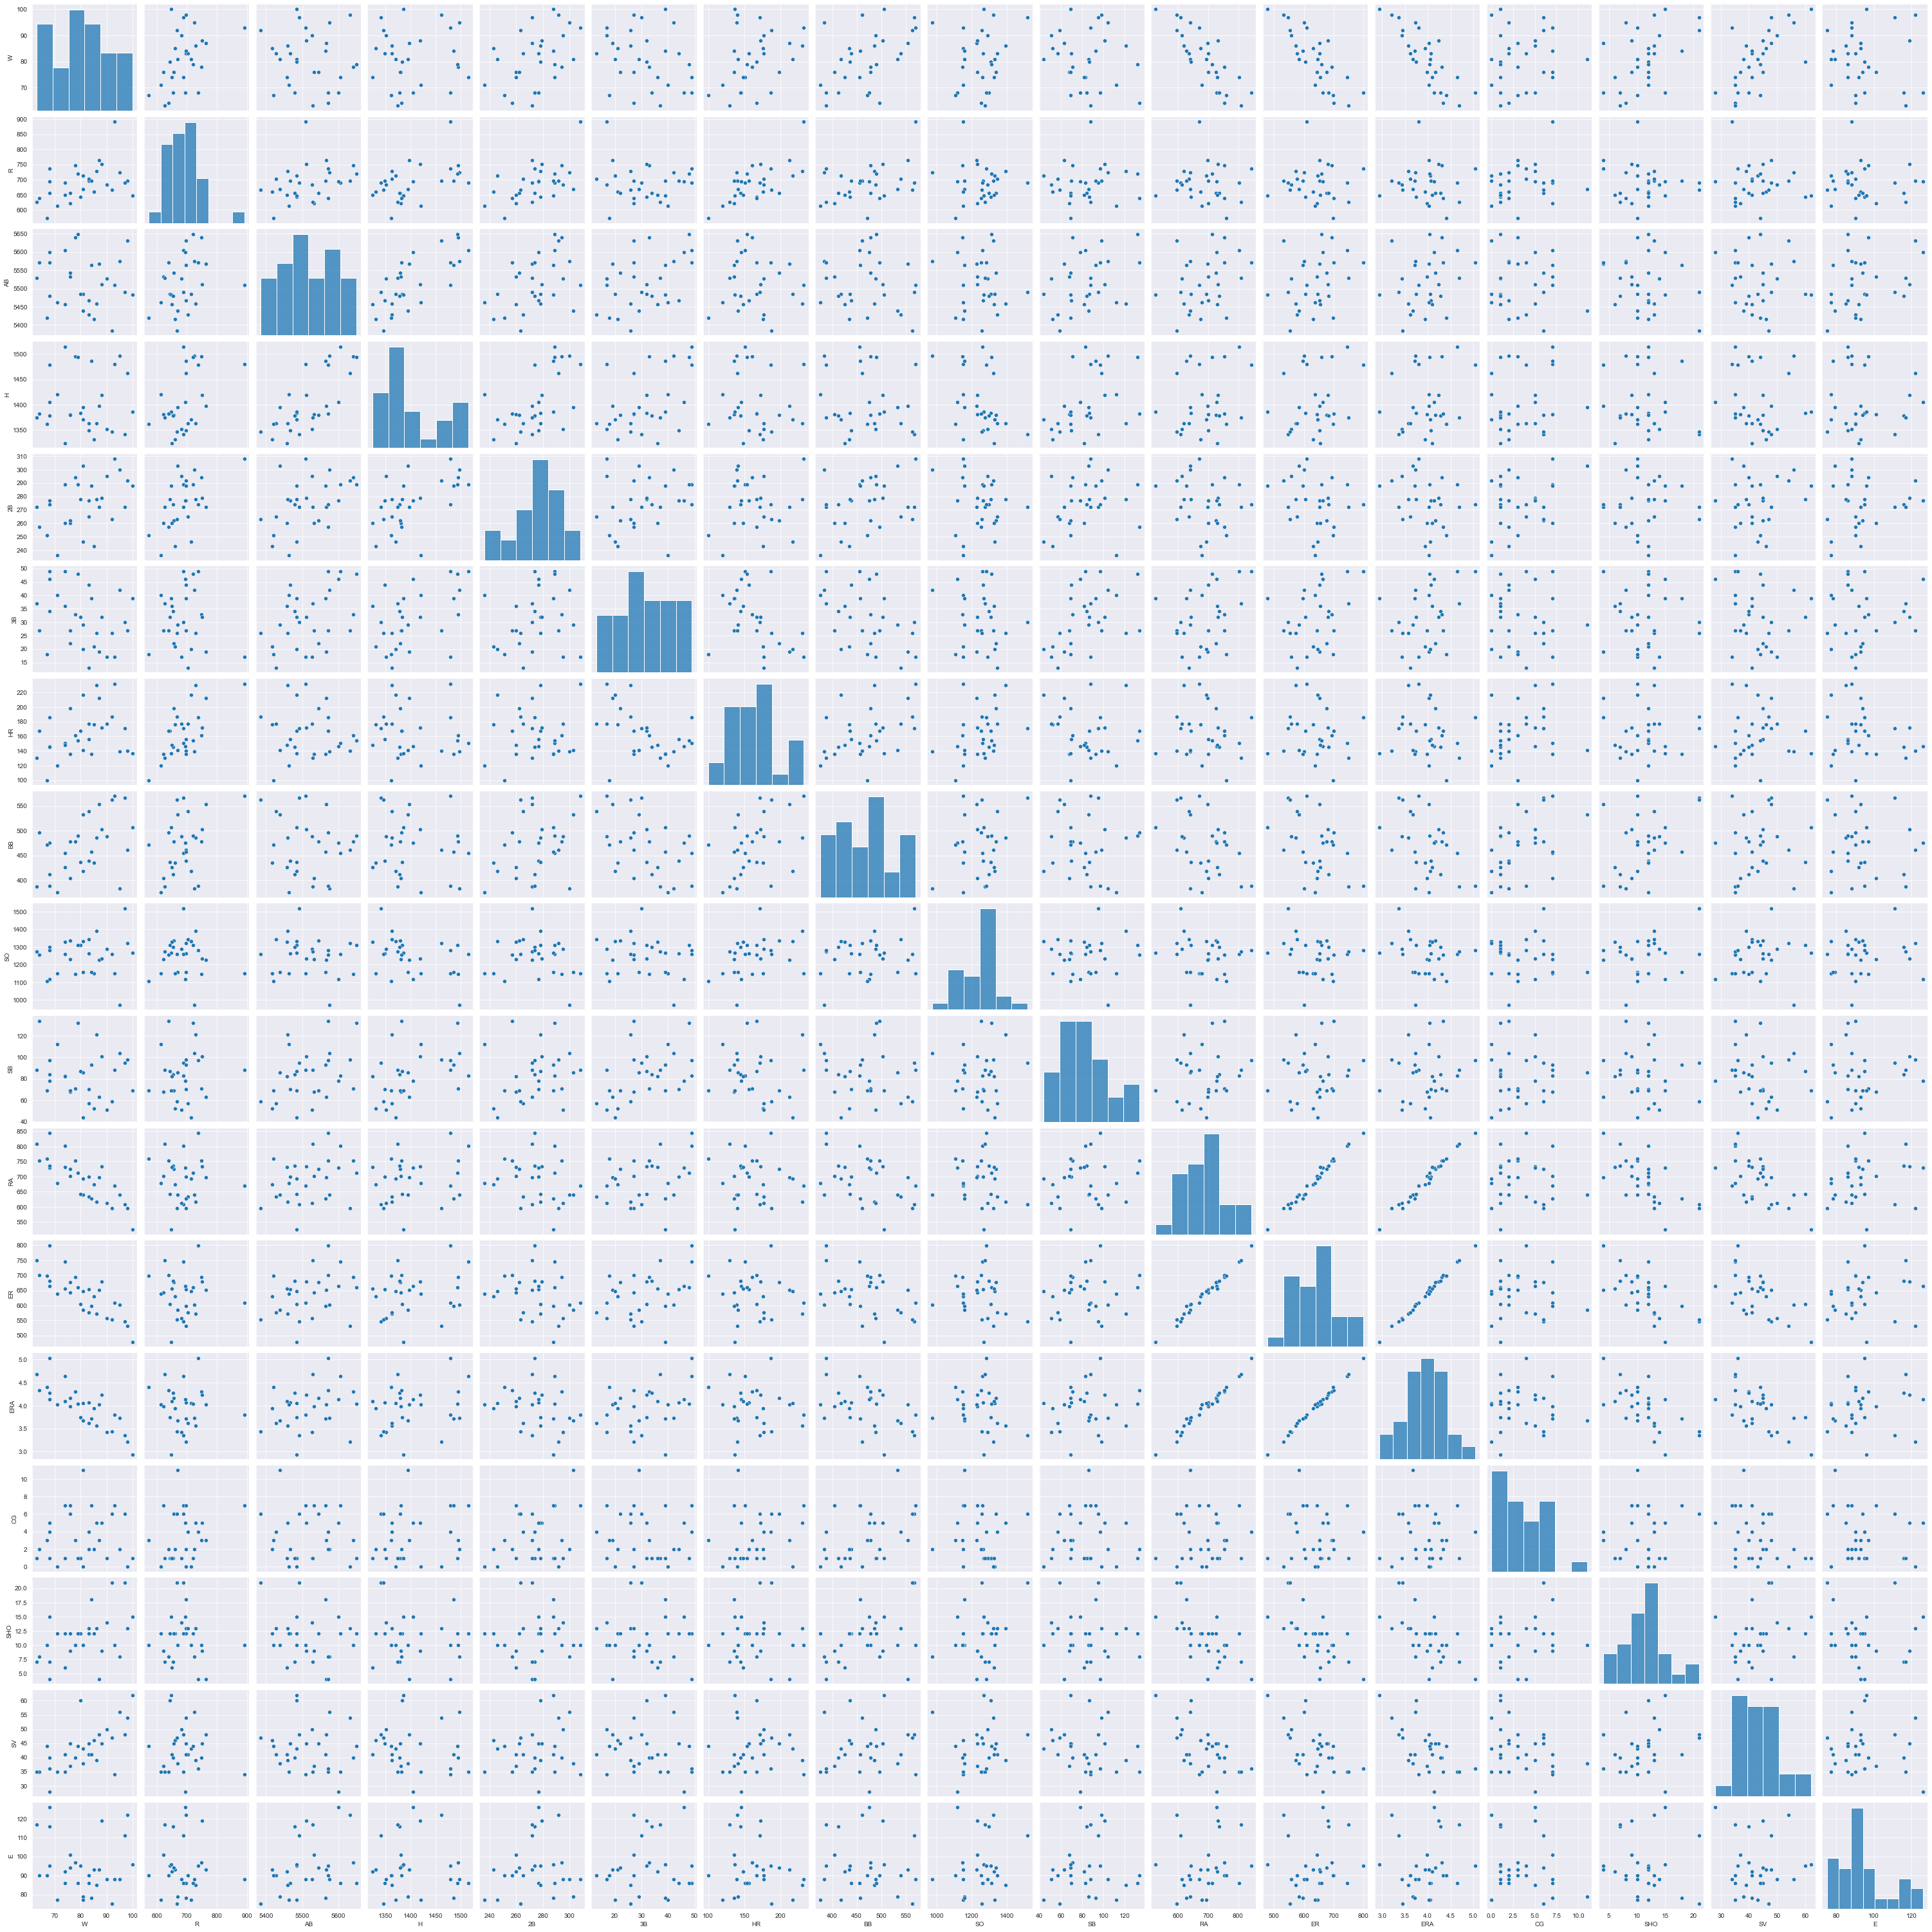

In [19]:
sns.pairplot(df)

# Distribution

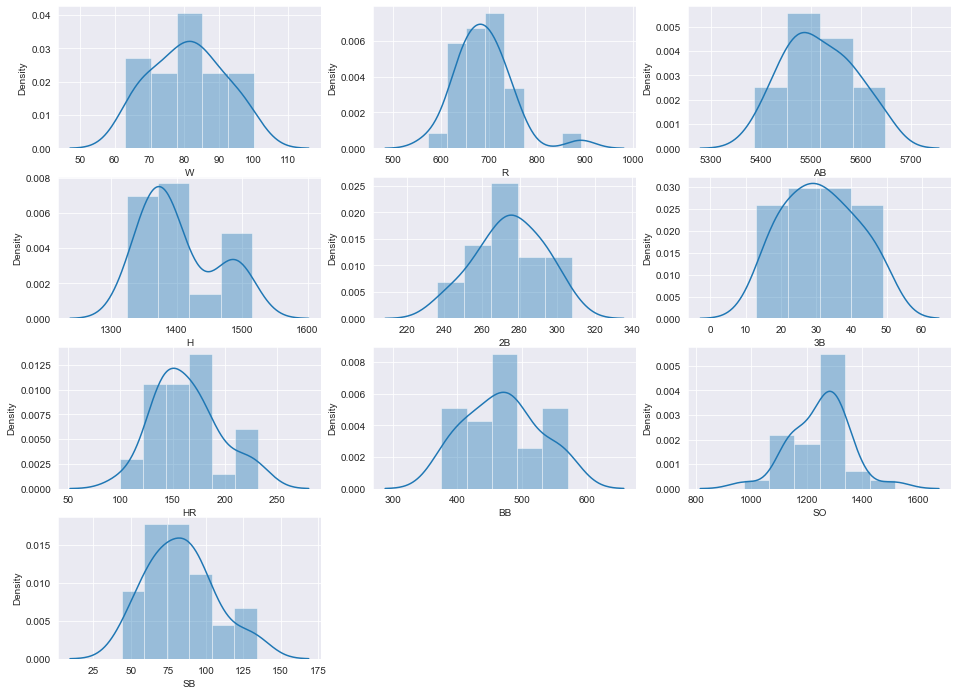

In [20]:
plt.figure(figsize=(16,12))
plot=1
for col in df:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

All of our data are Normally distributed.

# Outliers Detection

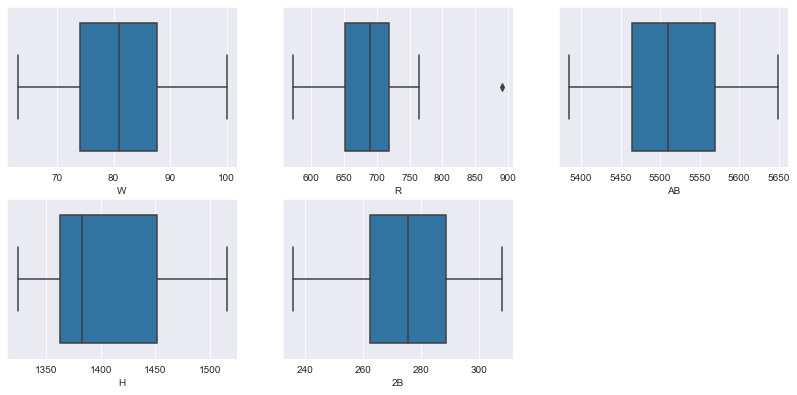

In [21]:
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

In [22]:
from scipy.stats import zscore
z =np.abs(zscore(df))
print(z.shape)
df_baseball = df.loc[(z<3).all(axis=1)]
print(df_baseball.shape)

(30, 17)
(29, 17)


we have drop the outliers from  out data. only 1 row dropped.

# Skewness

In [23]:
df_baseball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [24]:
for i in df_baseball:
    if df_baseball[i].skew()>=.55:
        df_baseball[i]=np.log1p(df_baseball[i])
        

In [25]:
df_baseball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

So, the skewed data has been normalised to it's possible extent.

# Splitting data into Input and Output Variable

In [26]:
x=df_baseball.drop(['W'],axis=1)
y=df_baseball[['W']]

In [27]:
x


,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908
6,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,4,3.891820,4.543295
7,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,10,3.784190,4.356709
8,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,12,4.110874,4.564348
9,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,10,3.713572,4.584967
10,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759,9,3.828641,4.787492


In [28]:
y

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.813262,1.554812,-0.435733
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.159299,0.296229,-0.598110
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.326982,-0.672787,-1.197382
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.570122,-0.825263,0.538291
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.159299,-1.142637,-0.598110
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.186270,-1.785822,0.667088,-0.045239
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.869855,-0.326982,0.035297,-1.378259
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.841793,0.159299,1.952930,0.105172
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.186270,-0.326982,-0.379227,0.252482
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.787648,-0.570122,0.296229,1.699369


# Feature Importance

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()
et.fit(x,y)

ExtraTreesRegressor()

In [31]:
print(et.feature_importances_)

[0.05927776 0.01392835 0.01945718 0.0166838  0.01122653 0.02657141
 0.02072693 0.03165482 0.01411213 0.21837588 0.17774688 0.15712956
 0.00843877 0.02418528 0.18147421 0.01901049]


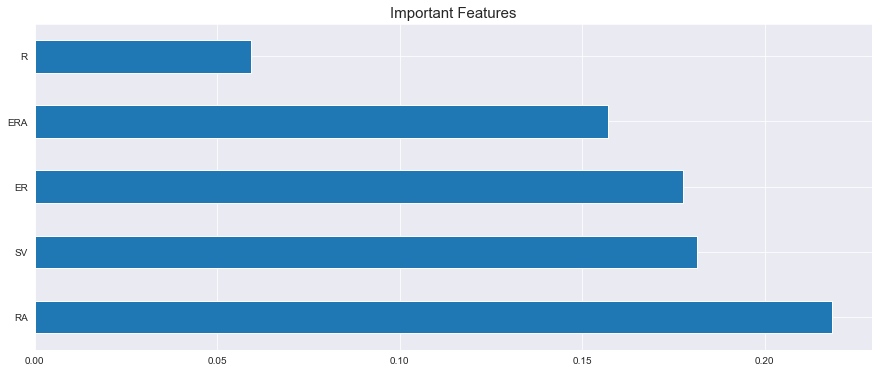

In [32]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(et.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

We can see that SV(Saves),RA(Runs Allowed),ERA(Earned Run Average) are the most important Features for prediction of Number of win counts for our Machine Learning Model

# Model Building

In [33]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [34]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r


In [35]:
#LINERAR rEGRESSION
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 73 is 0.8507709590470471


cross validation score 0.04078645834638232


Standard Deviation 0.44737734920591693


Training accuracy 0.9632661736539144


Test Accuracy 0.849090110876999


MAE 4.442997113976799


MSE 23.022141973986706


RMSE 4.798139428360404


73

In [36]:
## Lasso
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 82 is 0.9569861780928952


cross validation score 0.49033824821340977


Standard Deviation 0.6002031960611405


Training accuracy 0.8596965906875517


Test Accuracy 0.8752922811726905


MAE 3.810352441874779


MSE 19.024855327766215


RMSE 4.361749113345037


82

In [37]:
## Ridge
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 75 is 0.9656470425613889


cross validation score 0.3917445799642074


Standard Deviation 0.6838140520964888


Training accuracy 0.9326037702056971


Test Accuracy 0.9196126869876206


MAE 3.0388280178362983


MSE 12.263531196221889


RMSE 3.5019324945266845


75

In [38]:
## Decision Tree
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 65 is 0.8970268310369833


cross validation score -2.3971169531819103


Standard Deviation 4.206958280807407


Training accuracy 1.0


Test Accuracy 0.5400582665695557


MAE 7.833333333333333


MSE 70.16666666666667


RMSE 8.376554582086042


65

In [39]:
## KNN
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 51 is 0.7973065326633166


cross validation score 0.027111560669320613


Standard Deviation 0.7888810870744435


Training accuracy 0.6182682583105364


Test Accuracy 0.6643408594319009


MAE 6.633333333333333


MSE 51.20666666666668


RMSE 7.1558833603313206


51

In [40]:
##SVm
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 54 is 0.22178358793156283


cross validation score -0.2972022350274798


Standard Deviation 0.49177877863138775


Training accuracy 0.21985396844426752


Test Accuracy 0.15457624455188335


MAE 9.978375554568848


MSE 128.97409069225156


RMSE 11.356676040649022


54

In [41]:
## random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 46 is 0.7795927820922794


cross validation score -0.7651899538312312


Standard Deviation 2.1579972450159333


Training accuracy 0.9402936645113156


Test Accuracy 0.7071450473415875


MAE 5.6350000000000025


MSE 44.676650000000045


RMSE 6.684059395307618


46

In [42]:
## AdaBoost
Adb=AdaBoostRegressor(base_estimator=lasso)
maxr2_score(Adb,x,y)

max r2 score corresponding to 82 is 0.9167612326001556


cross validation score 0.39562429978462677


Standard Deviation 0.7417208708005529


Training accuracy 0.9085050428511475


Test Accuracy 0.8956829376220434


MAE 3.013355882513288


MSE 15.914147404992704


RMSE 3.989253991035505


82

In [43]:
## Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

max r2 score corresponding to 47 is 0.7763072047012497


cross validation score -1.3153065914561721


Standard Deviation 3.6620424259435063


Training accuracy 0.9999998270821823


Test Accuracy 0.7051988991804929


MAE 5.804440909531988


MSE 44.97354571390925


RMSE 6.706231856557694


47

From all above models we can see that Ridge Regressor has a very good training and Testing Accuracy. 

We will choose ridge regressor as our best model becasue the difference between the Test accuracy & Training accuracy score is very less as compare to other models.

# Hyperparameter Tuning of Ridge Regressor

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=.20)
ridge=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1],'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
glf=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'alpha': 1, 'solver': 'svd'}

In [49]:
ridge1=Ridge(alpha=1,solver='svd')
ridge1.fit(x_train,y_train)
pred=ridge1.predict(x_test)
print('Training accuracy',ridge1.score(x_train,y_train))
print('\n')
print('Test Accuracy',ridge1.score(x_test,y_test))
print('\n')

print('Error:')
print('MAE',mean_absolute_error(y_test,pred))
print('\n')
print('MSE',mean_squared_error(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('R2 score',r2_score(pred,y_test))
    

Training accuracy 0.9179210449221076


Test Accuracy 0.9656470425613889


Error:
MAE 1.717957231883311


MSE 4.642420498301201


RMSE 2.154627693663386


R2 score 0.9662212521645058


we can see that our test accuracy has imporved from 91.96 to 96.56. Our RMSE score also improved from 3.50  to 2.15. Hence this is our final Model 

# Saving the Model 

In [50]:
import joblib
joblib.dump(ridge1,'baseballR_1.pkl')

['baseballR_1.pkl']

# Loading the Model

In [51]:
loaded_model=joblib.load('baseballR_1.pkl')
prediction=loaded_model.predict(x_test)